# Analyzing Pregnancy Trends and Predictive Factors for Diabetes Outcomes

Student Names and IDs:

- Sarwat Sohail (FA23-MSBI-0001)
- Azba Shoaib (SP24-MSBI-0001)
- Bushra Maqsood (SP23-MSBI-0002)

## Scope of project

**Diabetes** is a chronic condition characterized by elevated blood glucose levels due to the body's inability to produce or effectively use insulin, a hormone that regulates blood sugar. The two primary types are Type 1, an autoimmune disorder where the pancreas produces little or no insulin, and Type 2, often associated with lifestyle factors, where the body becomes resistant to insulin or doesn't produce enough. Common symptoms include increased thir
st, frequent urination, fatigue, and slow healing of wounds. Managing diabetes typically involves lifestyle modifications, blood sugar monitoring, medication, or insulin therapy to prevent complications like cardiovascular disease, neuropathy, and kidney damage.

**Diabetes in pregnancy**, or gestational diabetes, develops in women without prior diabetes and is typically diagnosed during the second or third trimester. It occurs when hormonal changes during pregnancy impair insulin function, leading to elevated blood sugar levels. Proper management is crucial to avoid complications such as high birth weight, preterm birth, or preeclampsia for the mother, and hypoglycemia or respiratory issues for the newborn. Treatment involves dietary adjustments, regular exercise, blood glucose monitoring, and, in some cases, insulin therapy. Women with gestational diabetes have an increased risk of developing Type 2 diabetes later in life, highlighting the importance of post-pregnancy follow-up care.

In this dataset, we will be examining factors related to diabetes and their correlation with pregnancy, to see if we can pinpoint any trends or patterns between prenancy and diabetes development.

## Business Questions

1.	How many pregnancies do people with diabetes usually have (e.g., one pregnancy, multiple pregnancies)?
2.	Is there a clear link between the number of pregnancies and the chance of having diabetes?
3.	What patterns in glucose levels can be identified among individuals with varying numbers of pregnancies?
4.	At what threshold does the number of pregnancies significantly increase the likelihood of developing diabetes?
5.	How does BMI vary with the number of pregnancies among individuals diagnosed with diabetes?
6.	Is there a relationship between genetic risk factors for diabetes and glucose level?
7.	How does age influence the relationship between pregnancy count and diabetes risk?
8.	How does BMI and age affect the likelihood of developing diabetes among individuals with a history of pregnancies?
9.	What differences in insulin levels exist among individuals with varying numbers of pregnancies who have diabetes?



## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, log_loss, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## Importing Data

The dataset used was the **Pima Indians Diabetes Dataset**, which is available  from **Mendeley Data** as well as the ** UCI ML Repository**. The data was originally obtained from The National Institute of Diabetes and Digestive and Kidney Diseases (https://data.mendeley.com/datasets/7zcc8v6hvp/1).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset 1 – Pima Indians diabetes dataset (PIDD).xlsx')

In [ ]:
df.head()

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
Blood pressure,int64
Skin thickness,int64
Insulin,int64
Body mass index,float64
Diabetes pedigree function,float64
Age,int64
Outcome,int64


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualization

### Pregnancies

We visualize the variables in our data that are relevant to our business questions

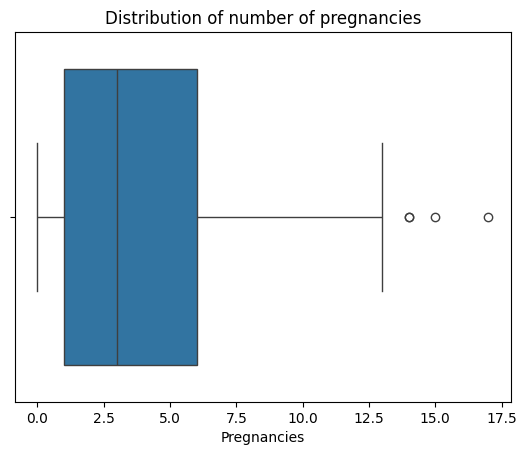

In [ ]:
sns.boxplot(x = df["Pregnancies"])
plt.title("Distribution of number of pregnancies")
plt.show()

We can see that the bulk of pregnancies range from 0 to ~12. However there are a few outliers that are greater than that; we can view the dataset to see if these can be considered errors or not

In [ ]:
df[df["Pregnancies"] >12]

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
357,13,129,0,30,0,39.9,0.569,44,1
455,14,175,62,30,0,33.6,0.212,38,1


The other variables in these observations seem within reasonable range, so we choose not to drop them.

### Glucose level

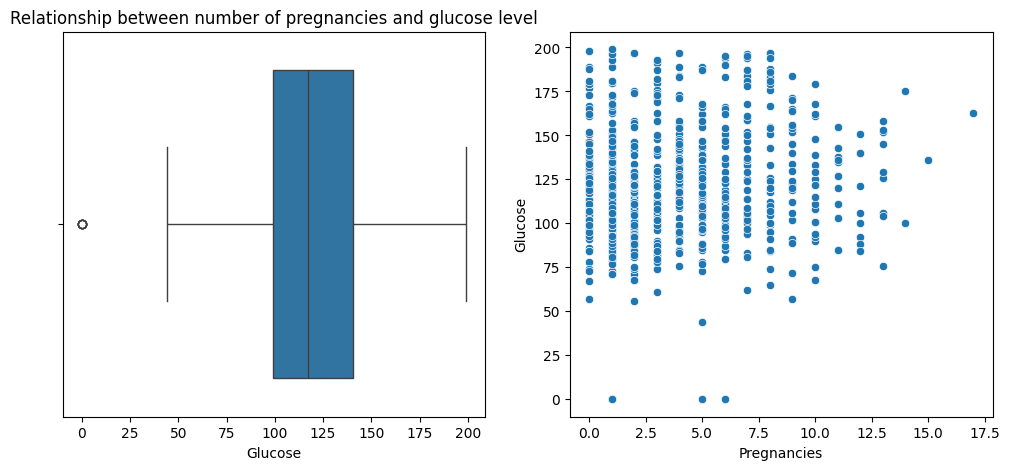

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.boxplot(x = df["Glucose"], ax = ax[0])
ax[0].set_title("Glucose range")

sns.scatterplot(x=df["Pregnancies"], y=df["Glucose"], ax = ax[1])
ax[0].set_title("Relationship between number of pregnancies and glucose level")
plt.show()

Normal glucose level range:

Visualizing the glucose level shows an interesting point: there is an outlier with 0 glucose, which isn't possible. We can see in the dataset below that we have 5 such observations. While it is theoretically possible for blood glucose to be ve

In [ ]:
df[df["Glucose"] == 0]

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


### BMI

A normal BMI is between 18.5 and 24.9.

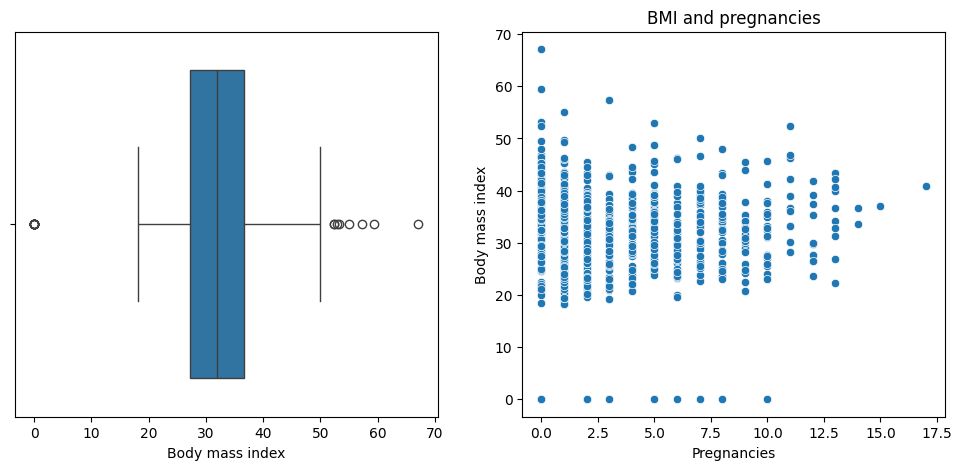

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x = df["Body mass index"], ax = ax[0])

sns.scatterplot(x=df['Pregnancies'], y=df['Body mass index'], ax = ax[1])
ax[1].set_title("BMI and pregnancies")

plt.show()

Data appears to need to be cleaned, as some observations seem to have 0 BMI.
Other than that, it appears that individuals with higher number of pregnancies have lesser BMI as compared to people with zero or lesser number of pregnancies.

### Diabetes Pedigree Function

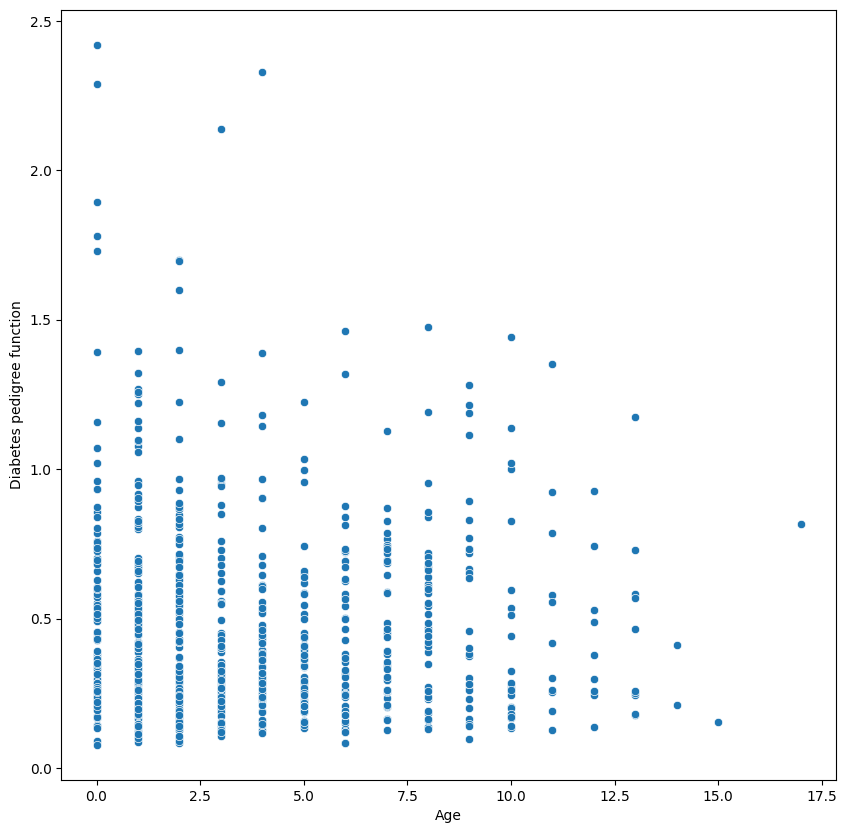

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['Pregnancies'], y=df['Diabetes pedigree function'])
ax.set_xlabel('Age')
ax.set_ylabel('Diabetes pedigree function')
plt.show()

It appears that individuals with greater number of pregnancies have lesser diabetes pedigree function as opposed to individuals with greater number of pregnancies.

Insight: The reason for this could be that individuals with diabetes pedigree could have babies with complications, leading to them recieving medical advice to have fewer pregnancies.

The significance could be calculated statistically later.


### Age

<Axes: xlabel='Age', ylabel='Count'>

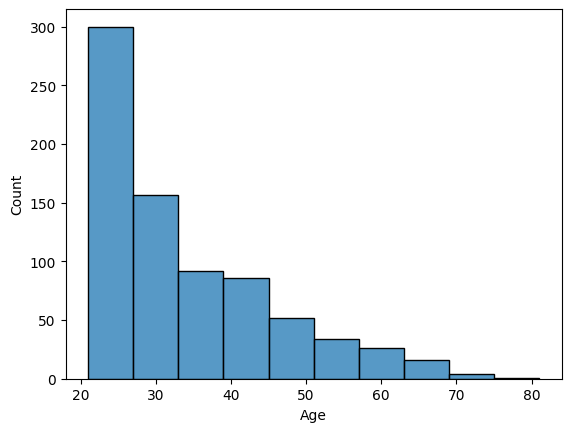

In [ ]:
sns.histplot(df["Age"], bins = 10)

### Insulin Levels

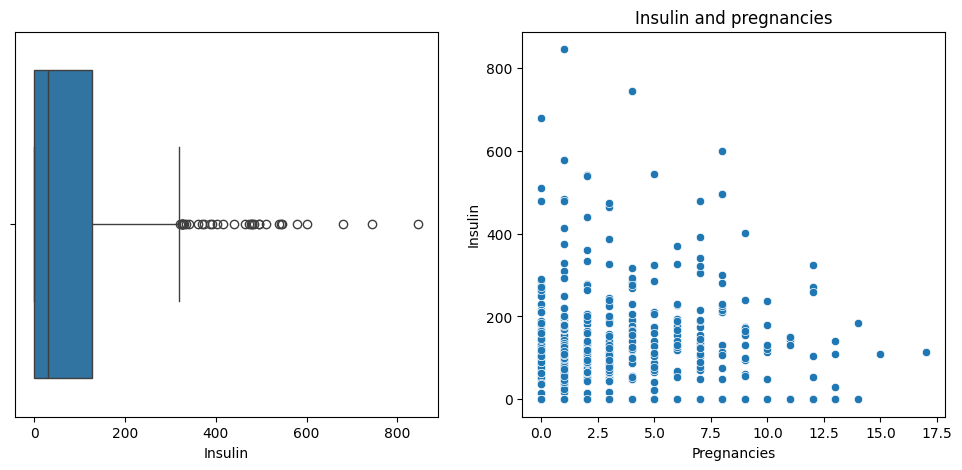

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x = df["Insulin"], ax = ax[0])

sns.scatterplot(x=df['Pregnancies'], y=df['Insulin'], ax = ax[1])
ax[1].set_title("Insulin and pregnancies")

plt.show()



There are quite a few extreme outliers in the insulin variable. The **normal range** is less than 25 milli-international units per liter (mIU/L). We may consider removing the 0 values since these are quite rare in normal contexts.

### Blood Pressure

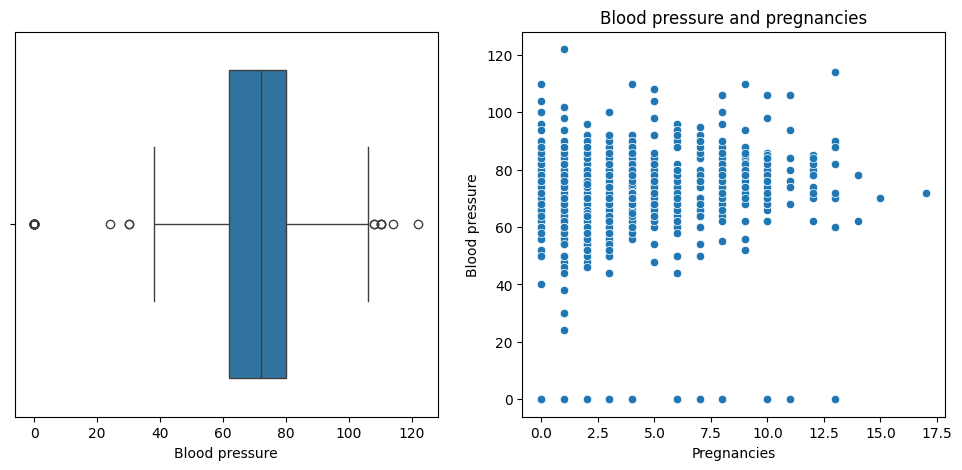

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x = df["Blood pressure"], ax = ax[0])

sns.scatterplot(x=df['Pregnancies'], y=df['Blood pressure'], ax = ax[1])
ax[1].set_title("Blood pressure and pregnancies")

plt.show()

Again, we will remove those observations with 0 BP values since these are likely to be errors (or replace them with the mean)

### Diabetes Outcome

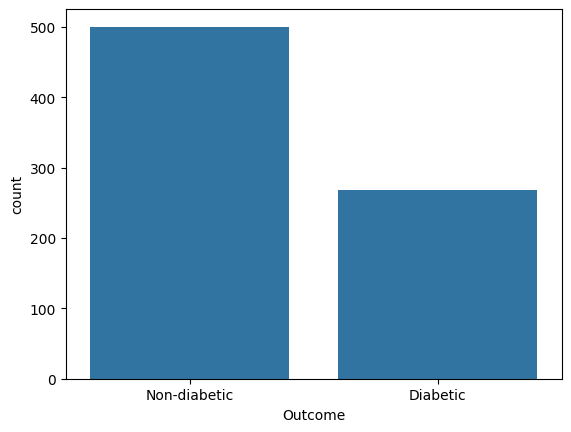

In [ ]:
sns.countplot(x = df["Outcome"])
plt.xticks([0, 1],["Non-diabetic", "Diabetic"])
plt.show()

## Post-visualization cleaning

After visualizing the data, we shall further clean it by removing the errors we found in it.

In [ ]:
columns_to_check = ["Glucose", "Blood pressure", "Skin thickness", "Insulin",	"Body mass index", "Age"]
zero_counts = (df[columns_to_check] == 0).sum()
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
Glucose              5
Blood pressure      35
Skin thickness     227
Insulin            374
Body mass index     11
Age                  0
dtype: int64


As seen, for the Age variable, there are no observations with 0 values. For Glucose and BMI, there are <15 observations each, that can be safely dropped.

For Insulin and Skin thickness, there are far greater observations with 0 values. For all cases where skin thickness == 0, we can replace them with the mean value. For insulin (since it might be possible in some special cases to have Insulin == 0), we will replace all such cases where the outcome is diabetes to the mean insulin level.

In [ ]:
df.loc[(df["Insulin"] == 0) & (df["Outcome"] == 0), "Insulin"] = df["Insulin"].mean()

In [ ]:
df.loc[df["Skin thickness"] == 0, "Skin thickness"] = df["Skin thickness"].mean()

In [ ]:
df = df[~((df["Body mass index"] == 0) | (df["Glucose"] == 0) | (df["Blood pressure"] == 0))]

In [ ]:
columns_to_check = ["Glucose", "Blood pressure", "Skin thickness", "Insulin",	"Body mass index", "Age"]
zero_counts = (df[columns_to_check] == 0).sum()
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
Glucose              0
Blood pressure       0
Skin thickness       0
Insulin            119
Body mass index      0
Age                  0
dtype: int64


Now we can see that we don't have any zero values in any of the relevant variables (except insulin)

## Correlation

<Axes: >

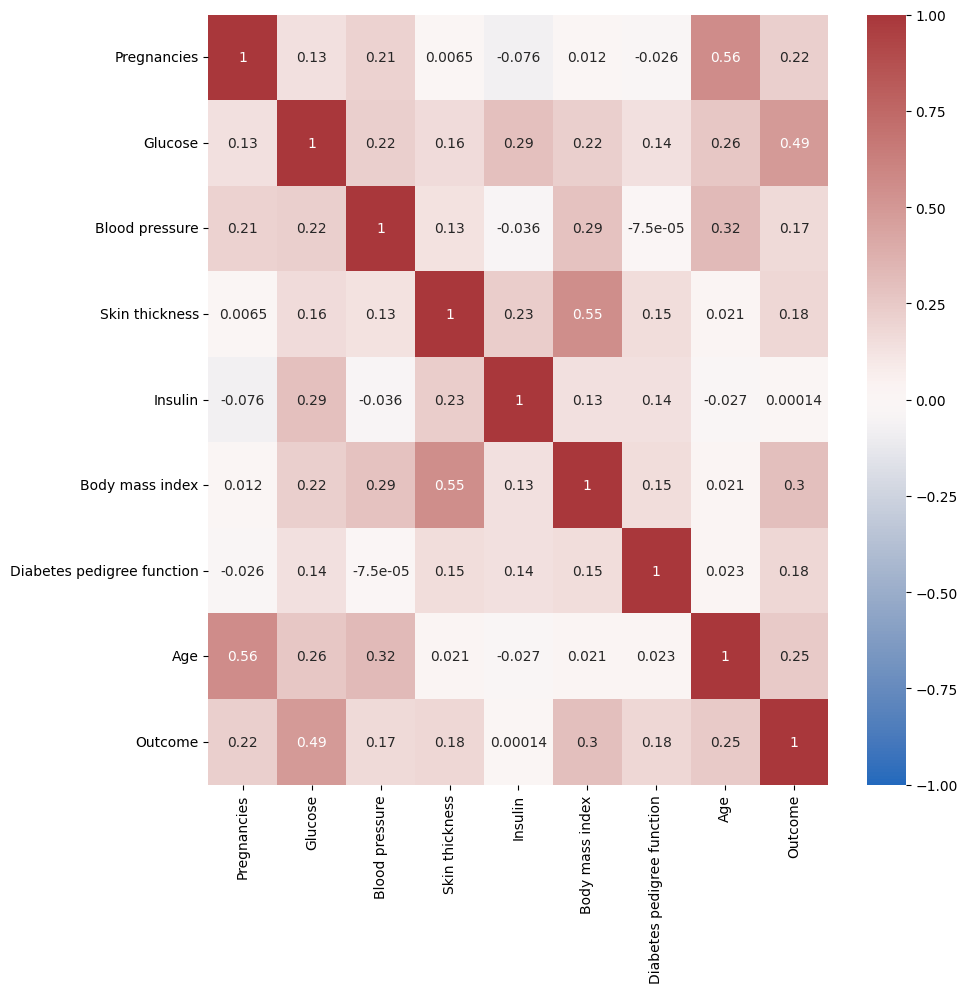

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'vlag', annot=True, vmin = -1, vmax = 1)

Age, BMI, Glucose and Pregnancies have greatest positive correlation with positive diabetes outcome.

BP and Skin thickness have greatest negative correlation with positive diabetes outcome (Skin thickness also has inverse correlation with age, which also makes sense)

Insulin and skin thickness have greatest negative correlation with pregnancies.

## Modelling

Now we will utilize different statistical and machine learning methods to answer our business questions

### Qs.1.	How many pregnancies do people with diabetes usually have (e.g., one pregnancy, multiple pregnancies)?


In [ ]:
diabetes_group = df[df['Outcome'] == 1]
no_diabetes_group = df[df['Outcome'] == 0]

avg_pregnancies_diabetes = diabetes_group['Pregnancies'].mean()
median_pregnancies_diabetes = diabetes_group['Pregnancies'].median()

print(f"Average number of pregnancies for people with diabetes: {avg_pregnancies_diabetes:.2f}")
print(f"Median number of pregnancies for people with diabetes: {median_pregnancies_diabetes:.2f}")

avg_pregnancies_no_diabetes = no_diabetes_group['Pregnancies'].mean()
print(f"Average number of pregnancies for people without diabetes: {avg_pregnancies_no_diabetes:.2f}")

Average number of pregnancies for people with diabetes: 4.91
Median number of pregnancies for people with diabetes: 4.00
Average number of pregnancies for people without diabetes: 3.32


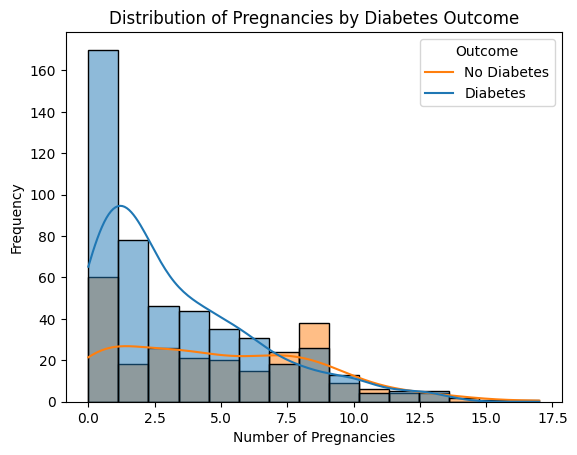

In [ ]:
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, bins=15)
plt.title("Distribution of Pregnancies by Diabetes Outcome")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequency")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()

**Insight:**

The data shows that people with diabetes tend to have more pregnancies, with an average of 4.87 compared to 3.30 for those without diabetes, and their distribution extends to higher pregnancy counts (5–10+), while most individuals without diabetes have 0–2 pregnancies. This suggests a possible correlation between a higher number of pregnancies and an increased likelihood of diabetes, potentially due to physiological or lifestyle factors associated with multiple pregnancies, such as gestational diabetes. Additionally, the slight skew in the diabetes group's distribution highlights that a subset of individuals with very high pregnancy counts could be driving the higher average. These findings warrant further investigation into underlying factors, such as age, BMI, or glucose levels, to better understand this relationship.

### Qs.2. Is there a clear link between the number of pregnancies and the chance of having diabetes?


In [ ]:
dum_df = pd.get_dummies(df)
dum_df = dum_df.fillna(0)
dum_df.head()
X = dum_df[['Pregnancies']]
y = dum_df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.70
Precision: 0.47
Recall: 0.19
F1-score: 0.27
Confusion Matrix:
[[93  9]
 [35  8]]


In [ ]:
coefficients = log_model.coef_[0]

# Calculate the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Display the odds ratios for each predictor
print("Odds Ratios: ", odds_ratios)

Odds Ratios:  [1.1575072]


**Insight:**

The odds ratio of 1.13 suggests a positive association between the number of pregnancies and the likelihood of developing diabetes. Specifically, for each additional pregnancy, the odds of having diabetes increase by **approximately 13%**. This indicates that women with more pregnancies may have a higher risk of developing diabetes, potentially due to physiological or hormonal changes associated with pregnancy that could contribute to metabolic alterations. While this relationship is statistically significant, it is important to consider other factors, such as age, lifestyle, and genetics, that might also influence the risk of diabetes. Further research could explore these contributing factors and their interactions.

### Qs.3. What patterns in glucose levels can be identified among individuals with varying numbers of pregnancies?



In [ ]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(df[['Glucose', 'Pregnancies']])

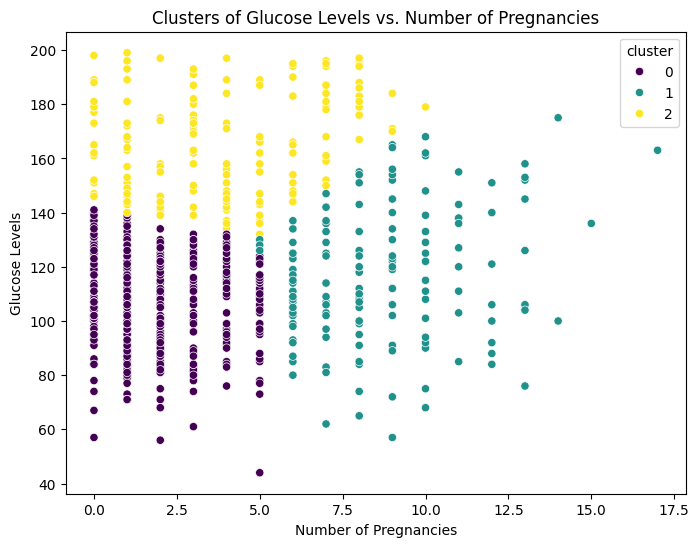

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original data
df['cluster'] = cluster_labels

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Pregnancies', y='Glucose', hue='cluster', palette='viridis')
plt.title('Clusters of Glucose Levels vs. Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Glucose Levels')
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[-0.52870504 -0.57572865]
 [-0.14311493  1.42134536]
 [ 1.39394606 -0.04976281]]


**Insight:**

The three clusters show different patterns when it comes to glucose levels and the number of pregnancies. In Cluster 0, people tend to have lower glucose levels and fewer pregnancies, so they might be at a lower risk for things like diabetes. Cluster 1 has people with fairly average glucose levels but more pregnancies, which could suggest that having more pregnancies might not necessarily cause high glucose levels. Lastly, Cluster 2 includes people with higher glucose levels and fewer pregnancies, which might point to a group that could be at a higher risk of diabetes, even though they haven't had many pregnancies. Overall, these clusters help us see that the relationship between pregnancies and glucose levels isn't straightforward, and different patterns can emerge.

K-Means clustering is based on the Euclidean distance between data points. Since our features are on different scales (glucose levels are in one range and number of pregnancies in another), the distance between data points will be disproportionately influenced by the feature with the larger range. Without scaling, the clustering process would give more weight to the glucose feature, and the number of pregnancies might have little impact on the clustering.

Scaling ensures that all features contribute equally to the distance calculation, allowing K-Means to treat them with the same level of importance.

###Qs.4. At what threshold does the number of pregnancies significantly increase the likelihood of developing diabetes?



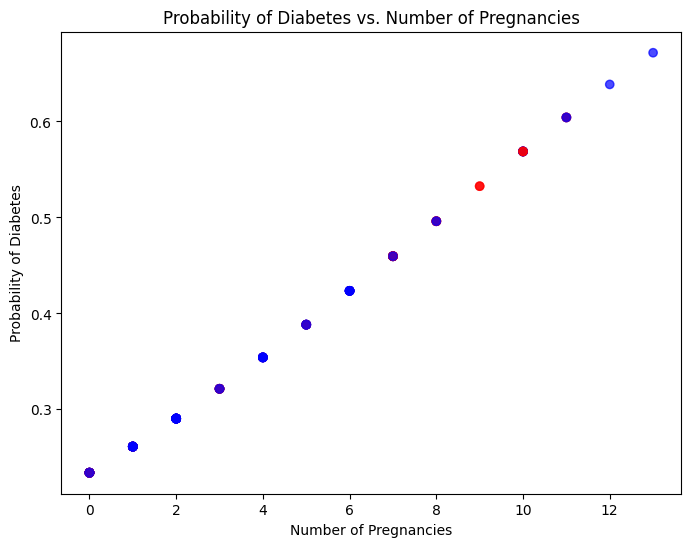

In [ ]:
prob = log_model.predict_proba(X_test)[:, 1]  # Probability of diabetes (class 1)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.scatter(X_test, prob, c=y_test, cmap='bwr', alpha=0.7)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Probability of Diabetes')
plt.title('Probability of Diabetes vs. Number of Pregnancies')
plt.show()

The straight diagonal line in the regression model suggests that the number of pregnancies alone doesn't strongly influence the likelihood of developing diabetes. This means that having more pregnancies might not significantly change the chances of getting diabetes, at least not on its own. It could indicate that other factors, like glucose levels, age, or BMI, are more important in predicting diabetes risk.

To improve the model, we could try adding the other factors we gained from our correlational heatmap (Age, BMI, Glucose level). Or we could try another model; eg, **a decision tree**.

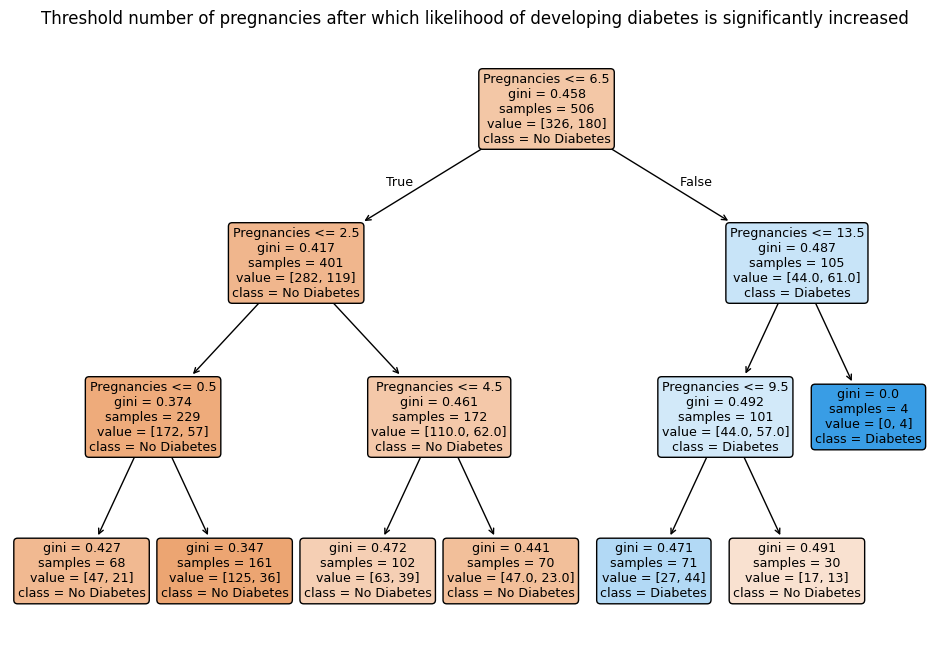

Threshold(s) where the risk of diabetes changes: [ 6.5  2.5  0.5 -2.  -2.   4.5 -2.  -2.  13.5  9.5 -2.  -2.  -2. ]


In [ ]:
X = df[['Pregnancies']]  # We are only interested in the number of pregnancies
y = df['Outcome']  # Target variable (Diabetes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree classifier
model_tree = DecisionTreeClassifier(max_depth=3)  # Limit the depth to avoid overfitting
model_tree.fit(X_train, y_train)

# Plot the decision tree to visualize the thresholds
plt.figure(figsize=(12, 8))
plot_tree(model_tree, filled=True, feature_names=['Pregnancies'], class_names=['No Diabetes', 'Diabetes'],
          rounded=True, proportion=False)
plt.title('Threshold number of pregnancies after which likelihood of developing diabetes is significantly increased')
plt.show()

# Print the threshold (split point) where the probability of diabetes changes
print(f"Threshold(s) where the risk of diabetes changes: {model_tree.tree_.threshold}")

In [ ]:
for i, threshold in enumerate(model_tree.tree_.threshold):
    if threshold != -2:  # -2 means no further split at this node (leaf)
        # Get the class distribution for this node
        class_distribution = model_tree.tree_.value[i][0]
        total_samples = np.sum(class_distribution)
        diabetes_percentage = (class_distribution[1] / total_samples) * 100
        print(f"Threshold: {threshold}, Diabetes Proportion: {diabetes_percentage:.2f}%")


Threshold: 6.5, Diabetes Proportion: 35.57%
Threshold: 2.5, Diabetes Proportion: 29.68%
Threshold: 0.5, Diabetes Proportion: 24.89%
Threshold: 4.5, Diabetes Proportion: 36.05%
Threshold: 13.5, Diabetes Proportion: 58.10%
Threshold: 9.5, Diabetes Proportion: 56.44%


**Insight:**

The analysis reveals that the risk of developing diabetes increases with the number of pregnancies, with the most significant leap occurring after approximately 9.5 pregnancies, where the diabetes proportion jumps to over 54%. Prior to this threshold, the diabetes risk rises moderately, with the proportion reaching around 35% after 6.5 pregnancies. However, once the number of pregnancies exceeds 9.5, the likelihood of developing diabetes rises sharply, suggesting a critical tipping point. This substantial increase indicates that individuals with more than 9 pregnancies are at a markedly higher risk of diabetes, which may warrant targeted health interventions or closer monitoring for those with a history of multiple pregnancies.

Further analysis could be done by gaining a larger sample size, or by getting a more comprehensive dataset (e.g., one with ore granular details on diabetic history, pregnancy history, etc)

### Qs.5.	How does BMI vary with the number of pregnancies among individuals diagnosed with diabetes?



In [ ]:
diabetes_data = df[df['Outcome'] == 1]


X = diabetes_data[['Pregnancies']]
y = diabetes_data['Body mass index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 50.44
R-squared Score: 0.01


**Insight:**

After analyzing the relationship between BMI and the number of pregnancies among individuals diagnosed with diabetes, the results showed a very low R-squared score of 0.03. This means that the number of pregnancies explains only 3% of the variation in BMI for this group, suggesting that pregnancies alone are not a strong predictor of BMI. The mean squared error (MSE) also seems to indicate that the predictions are not very accurate.


### Qs.6. Is there a relationship between genetic risk factors for diabetes and glucose level?

We shall use **Ordinary Least Squares (OLS) regression model** as it is better for gauging relationships between variables (by giving p-value, etc)

In [ ]:
X = df[['Diabetes pedigree function']]
y = df['Glucose']

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.73
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           0.000227
Time:                        17:40:35   Log-Likelihood:                -3500.3
No. Observations:                 724   AIC:                             7005.
Df Residuals:                     722   BIC:                             7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Insights:**

The analysis shows a statistically significant but weak relationship between the Diabetes pedigree function (a measure of genetic risk for diabetes) and glucose levels. The model suggests that for each unit increase in genetic risk, glucose levels increase by about 13.25 units. However, the R-squared value of 0.019 indicates that only 1.9% of the variation in glucose levels can be explained by this genetic factor. This implies that while genetic risk has some influence on glucose levels, other factors not included in the model likely play a much larger role in determining glucose levels.

### Qs.7. How does age influence the relationship between pregnancy count and diabetes risk

In [ ]:
X = df[['Pregnancies', 'Age']]  # Independent variables: Pregnancy count and Age
X['Pregnancy_Age_Interaction'] = X['Pregnancies'] * X['Age']  # Interaction term
y = df['Outcome']  # Dependent variable: Diabetes risk (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Get coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[ 0.39364758  0.05926065 -0.00773037]]
Intercept: [-2.98763747]


In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Get predicted labels (binary classification: 0 or 1)
y_pred = model.predict(X_test)

In [ ]:
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc_roc:.3f}")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Calculate Log-Loss (cross-entropy loss)
logloss = log_loss(y_test, y_pred_prob)
print(f"Log-Loss: {logloss:.3f}")

# Calculate Mean Squared Error (MSE) if you want
mse = mean_squared_error(y_test, y_pred_prob)
print(f"Mean Squared Error (MSE): {mse:.3f}")

AUC-ROC: 0.667
Accuracy: 0.710
Log-Loss: 0.578
Mean Squared Error (MSE): 0.195


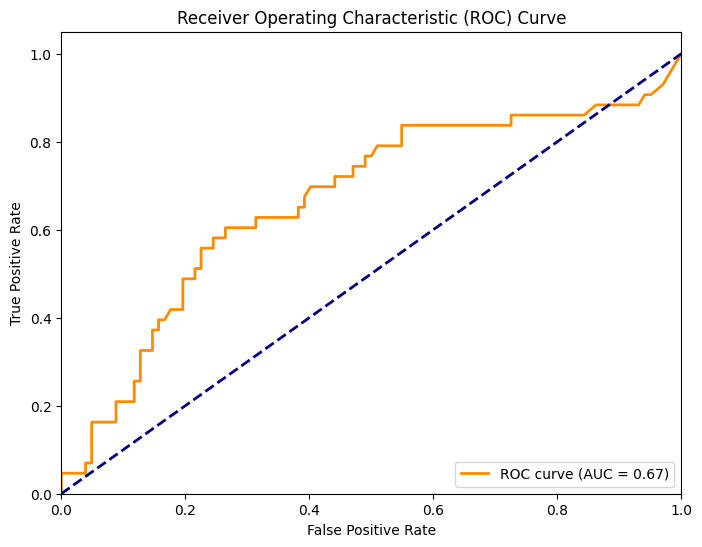

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Insights:**

The model shows a moderate ability to predict diabetes risk. The AUC-ROC of 0.606 suggests that the model can somewhat distinguish between people at risk and not at risk, but it’s not very strong. With an accuracy of 0.617, about 62% of the predictions are correct, which is a bit better than random guessing but still has room for improvement. The Log-Loss of 0.652 means the model's probability predictions aren't very close to the actual outcomes, showing some uncertainty in its predictions. The Mean Squared Error (MSE) of 0.230 shows how much error there is on average in the predicted probabilities. Overall, the model could be improved, perhaps by adding more features or using a different model.

### Qs.8. How does BMI and age affect the likelihood of developing diabetes among individuals with a history of pregnancies?

We use Random Forest algorithm to gauge this answer as the relationship might not be Linear (BMI may not necessarily go up as age increases)

In [ ]:
# Prepare the data
X = df[['Body mass index', 'Age', 'Pregnancies']]  # Features
y = df['Outcome']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print(f'Metrics for Random Forest Model')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.2f}")
print(f"Log-Loss: {log_loss(y_test, y_pred_prob):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Metrics for Random Forest Model
Accuracy: 0.71
Precision: 0.52
Recall: 0.37
F1-Score: 0.43
AUC-ROC: 0.67
Log-Loss: 0.58
Confusion Matrix:
[[87 15]
 [27 16]]


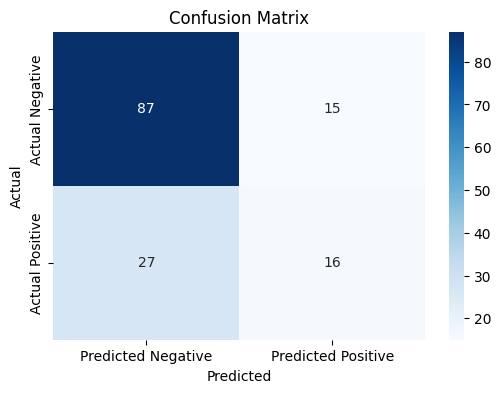

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

We can view the feature importance to get the answer to our question:

In [ ]:
importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: Body mass index, Importance: 0.4994
Feature: Age, Importance: 0.3370
Feature: Pregnancies, Importance: 0.1636


**Insights:**

The results indicate that Body Mass Index (BMI) is the most important feature for predicting diabetes risk in the model, with an importance score of 0.4861. This suggests that BMI plays a significant role in the model's decision-making process. Age follows closely with an importance score of 0.3433, indicating that age is also a key factor, but less influential than BMI. Lastly, Pregnancies has the lowest importance score of 0.1706, meaning it contributes less to the prediction of diabetes risk compared to BMI and age.

### Qs.9. What differences in insulin levels exist among individuals with varying numbers of pregnancies who have diabetes?

In [ ]:
diabetes_data = df[df['Outcome'] == 1]

# Select features for clustering (Insulin levels and Pregnancy count)
data = diabetes_data[['Pregnancies', 'Insulin']].dropna()  # Remove rows with missing values

# Standardize features for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters (adjust as needed)
data['Cluster'] = kmeans.fit_predict(data_scaled)

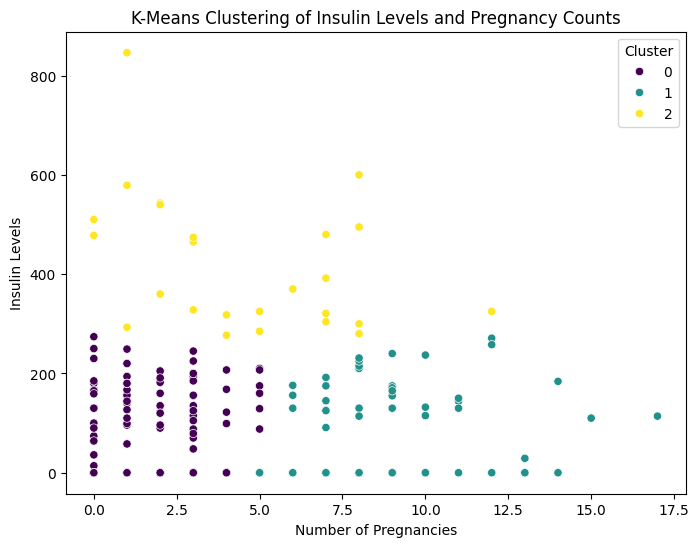

In [ ]:

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pregnancies', y='Insulin', hue='Cluster', data=data, palette='viridis')
plt.title("K-Means Clustering of Insulin Levels and Pregnancy Counts")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Insulin Levels")
plt.legend(title='Cluster', loc='best')
plt.show()


**Insights:**

The K-Means clustering shows three groups based on pregnancies and insulin levels in people with diabetes. One group includes those with fewer pregnancies and lower insulin levels, possibly showing less insulin-related issues. Another group has a moderate number of pregnancies and higher insulin levels, suggesting they might be more affected. The last group includes people with more pregnancies but lower insulin levels, showing that having more pregnancies doesn’t always mean higher insulin levels. These groups give a clearer picture of how pregnancies and insulin levels are related and might help in future research.

## Conclusions

Individuals with diabetes tend to have more pregnancies (average 4.87 vs. 3.30) and are more likely to have 5–10+ pregnancies.

For each additional pregnancy, the odds of developing diabetes increase by 13%, likely due to physiological or hormonal changes during pregnancy.

Clustering shows distinct patterns: lower glucose levels with fewer pregnancies, average glucose with more pregnancies, and higher glucose with fewer pregnancies, indicating diverse risk profiles.

Diabetes risk rises moderately until 6.5 pregnancies (35%) but sharply increases to over 54% after 9.5 pregnancies, suggesting a critical tipping point.

BMI and the number of pregnancies show a very weak relationship (R² = 0.03), indicating pregnancies alone are not a strong predictor of BMI in diabetes cases.

Genetic risk has a weak but statistically significant association with glucose levels, with a 13.25-unit glucose increase per genetic risk unit (R² = 0.019).
The model has moderate predictive performance (AUC-ROC = 0.606, accuracy = 61.7%) but requires improvement for better reliability.

BMI is the most important feature for predicting diabetes risk (importance score = 0.4861), followed by age (0.3433) and pregnancies (0.1706).

K-Means clustering identifies three distinct groups based on pregnancies and insulin levels, highlighting varied relationships between these factors.



## Limitations and Improvements

The project could be significantly improved by obtaining larger and more comprehensive datasets. A bigger dataset would increase the statistical power of the analysis, reducing the likelihood of biases or overfitting. Comprehensive variables—such as detailed medical history, lifestyle factors, socioeconomic status, dietary patterns, and access to healthcare—would allow for a more nuanced understanding of the relationships between diabetes, pregnancies, and other predictors. For example, including variables like gestational diabetes history, postpartum care, or hormonal profiles could uncover previously overlooked connections. This expanded dataset could also enable subgroup analyses, such as examining different age groups, ethnicities, or BMI categories, to identify population-specific trends and risk factors.

Additionally, moving beyond simpler models like linear regression to more advanced algorithms could enhance the project’s predictive power. Machine learning models such as Gradient Boosting Machines (e.g., XGBoost), or Neural Networks are well-suited to capturing complex, non-linear relationships in data. These algorithms can handle interactions between variables more effectively, identify subtle patterns, and improve the accuracy of diabetes risk predictions. Techniques like hyperparameter tuning and cross-validation can further optimize model performance. By combining advanced algorithms with richer datasets, the project would not only provide more reliable predictions but also generate deeper insights into the multifaceted nature of diabetes risk factors, paving the way for targeted interventions